In [54]:
# Bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


In [55]:
# dataset = pd.read_csv('WDO$N_M1.csv',sep='\t')
#linha pega o preço de abertura de abertura pro treinamento
# reducao = dataset.loc[:,['<DATE>','<TIME>','<OPEN>','<CLOSE>']]
# reducao.to_csv('reduzidoTotal.csv', sep='\t',index= False)
# reducao
#dataset.shape
#dataset.info()

# result.to_csv('gapsDiaFecha.csv',sep='\t',index = False)
#gaps2.shape
# gaps.to_csv('gapsDiaDiaWDO_M1.csv', sep='\t',index = False)

# gaps = pd.read_csv('gapsDiaDiaWDO_M1.csv', sep='\t')
# gaps
  

In [56]:
# #dia 2 do gap
# filtro_gap =  ( abs(dataset['<OPEN>'] - dataset.shift()['<CLOSE>'])>5) 
# filtro_gap_dia = ( dataset['<DATE>'] != dataset.shift()['<DATE>'] ) 
# teste = filtro_gap & filtro_gap_dia
# # filtro_gap
# gaps = dataset.loc[teste]

# #dia 1 do gap
# # filtro_dia_ant_pre = (abs(dataset['<CLOSE>'] - dataset.shift(-1)['<OPEN>']) >5)
# # filtro_dia_ant_data =  (dataset['<DATE>'] != dataset.shift(-1)['<DATE>'])

# # preco_ant = filtro_dia_ant_pre & filtro_dia_ant_data
# # gaps2 = dataset.loc[preco_ant]

# precosFechamento = gaps2.loc[:,['<CLOSE>']]
# precosFechamento.rename(columns ={ '<CLOSE>':'<PRECO_ANT>'},inplace = True)
# # precosFechamento.to_csv('precoFecha.csv', sep='\t',index= False)

# gaps = pd.read_csv('gapsDiaDiaWDO_M1.csv', sep='\t')
# precosFechamento = pd.read_csv('precoFecha.csv',sep='\t')
# result = pd.merge(gaps, precosFechamento, left_index=True, right_index=True)

# reducao = result.loc[:,['<DATE>','<TIME>','<OPEN>','<CLOSE>','<PRECO_ANT>']]
# reducao.to_csv('reduzido.csv', sep='\t',index= False)
# reducao
# gaps5 = pd.read_csv('gaps.csv')
# gaps = pd.read_csv('gapsPrecoTempoTam.csv',sep = '\t')
# mm = pd.read_csv('minMaxAnt.csv')

# #result = pd.merge(gaps5, tempos, left_index=True, right_index=True)
# result2 = pd.merge(gaps, mm, left_index=True, right_index=True)
# result2.to_csv('gapsPrecoTempoTamMM.csv', sep='\t',index= False)
# result2

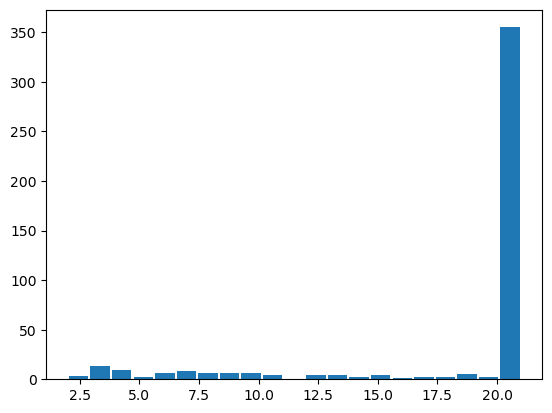

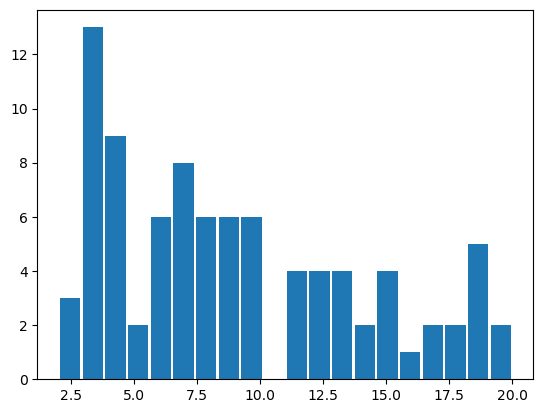

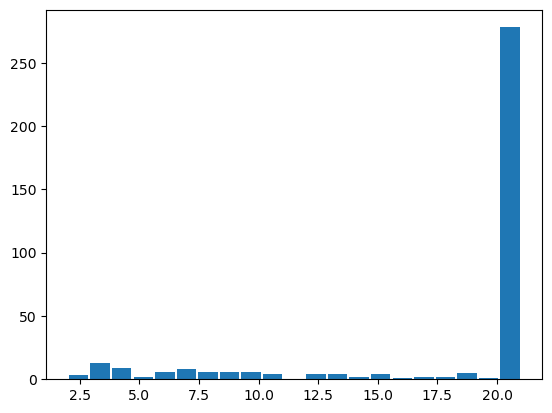

In [57]:
#dataset2 = pd.read_csv('WIN$N_M1.csv',sep='\t')
#dataset2

#linha abaixo pega as colunas datas, preço de abertura e close
#aux = dataset.loc[:,['<DATE>','<OPEN>','<CLOSE>']]
#aux

datas = pd.read_csv('gapsPrecoTempoTamMM.csv',sep = '\t')

plt.hist(datas['<TEMP_GAP>'], 21, rwidth = 0.9)
plt.show()

fechou = datas['<TEMP_GAP>']<21

plt.hist(datas['<TEMP_GAP>'].loc[fechou], 20, rwidth = 0.9)
plt.show()

naoFechou = (datas['<TEMP_GAP>']==21) & (abs(datas['<TAM_GAP>'])<35)

menoresGaps = abs(datas['<TAM_GAP>'])<35

plt.hist(datas['<TEMP_GAP>'].loc[menoresGaps], 21, rwidth = 0.9)
plt.show()



In [62]:
fig  = px.scatter(datas, x = '<TEMP_GAP>', y = '<TAM_GAP>', width = 800)
fig.update_xaxes(title = 'tempo  para fechar o gap(min)')
fig.update_yaxes(title = 'tamanho do gap')
fig.show()


# tamGap por min max anterior fechou
fig2  = px.scatter(datas, x = datas['<CLOSE>'].loc[fechou], y = datas['<MIN_MAX>'].loc[fechou],color=datas['<TAM_GAP>'].loc[fechou], width = 1000)
fig2.update_xaxes(title = 'preco de fechamento')
fig2.update_yaxes(title = 'minMax 20 min antes')
fig2.show()

# tamGap por min max anterior nao fechou



fig3  = px.scatter(datas, x = datas['<CLOSE>'].loc[naoFechou], y = datas['<MIN_MAX>'].loc[naoFechou],color=datas['<TAM_GAP>'].loc[naoFechou], width = 1000)
fig3.update_xaxes(title = 'preco de fechamento')
fig3.update_yaxes(title = 'minMax 20 min antes')
fig3.show()






